In [1]:
import simulation2 as sim
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from matplotlib import cm
from tqdm import tqdm

In [2]:
v0 = 50 # Active force
k = 10.  # Stiffness of interaction
boundary = 20
n = 500
# Assume 0 for now
epsilon = 2.  # Attractive component of interaction
tau = 5.0
params = v0, tau, k, epsilon
output, interactions = sim.compute_main(n, params, boundary)

v0:50, tau:5.0, k:10.0, epsilon:2.0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 20.88it/s]


In [3]:
def simplePlot(x:np.array, y:np.array, cmap:str='jet', xlab:str = 'X', ylab:str = 'Y', colorBarLabel:str = '', ax:mpl.axes.Axes = None, fig = None, display:bool = True, saveName:str = None, gridBool:bool = False, color:str = 'b', alpha:float = 0.5):
    """
    Plot a scalar field with colors on a 2D grid.

    If ax is already given as argument, will display on that plot. 
    Otherwise, this function creates a new plot.

    Args:
    -----
    - `x` (array-like): X positions.
    - `y` (array-like): Y positions.
    - `vals` (array-like): Scalar values.
    - `cmap` (str, optional): Name of the colormap (default is 'jet').
    - `colorBarLabel` (str, optional): Label of the colorbar (default is '')
    - `xlab` (str, optional): Label of the x axis (default is 'X').
    - `ylab` (str, optional): Label of the y axis (default is 'Y').
    - `ax` (matplotlib.axes._axes.Axes, optional): The axis to plot on.
    - `fig`(..., optional): The figure of the plot
    - `display` (bool, optional): True if want it to be displayed
    - `saveName` (str, optional): Name of the file where it is saved.
        If None, it is not saved
    - `gridBool` (bool, optional): True if want the grid to be displayed

    Returns:
    --------
    ax and fig form matplotlib

    If ax is already given as input, fig is None

    """

    ## generate ax and fig of the figure
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(x, y, color = color, alpha=alpha)
    ax.plot(x, y, color = color, alpha = alpha)


    ax.set_xlabel(f'{xlab}')
    ax.set_ylabel(f'{ylab}')
    if gridBool:
        ax.grid(True)

    if saveName:
        plt.savefig(f'{saveName}')

    if display:
        plt.show()

    return ax, fig

(<Axes: xlabel='X', ylabel='Y'>, <Figure size 1000x1000 with 1 Axes>)

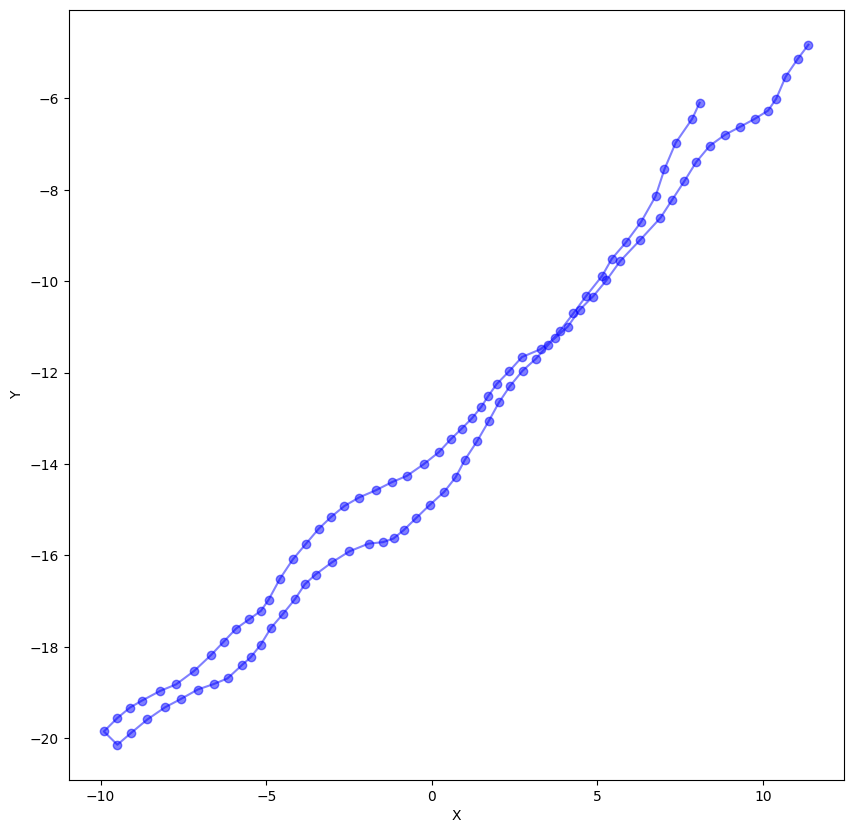

In [4]:
i = 2
simplePlot(output[:, i, 0], output[:, i, 1], display=False, color='b')

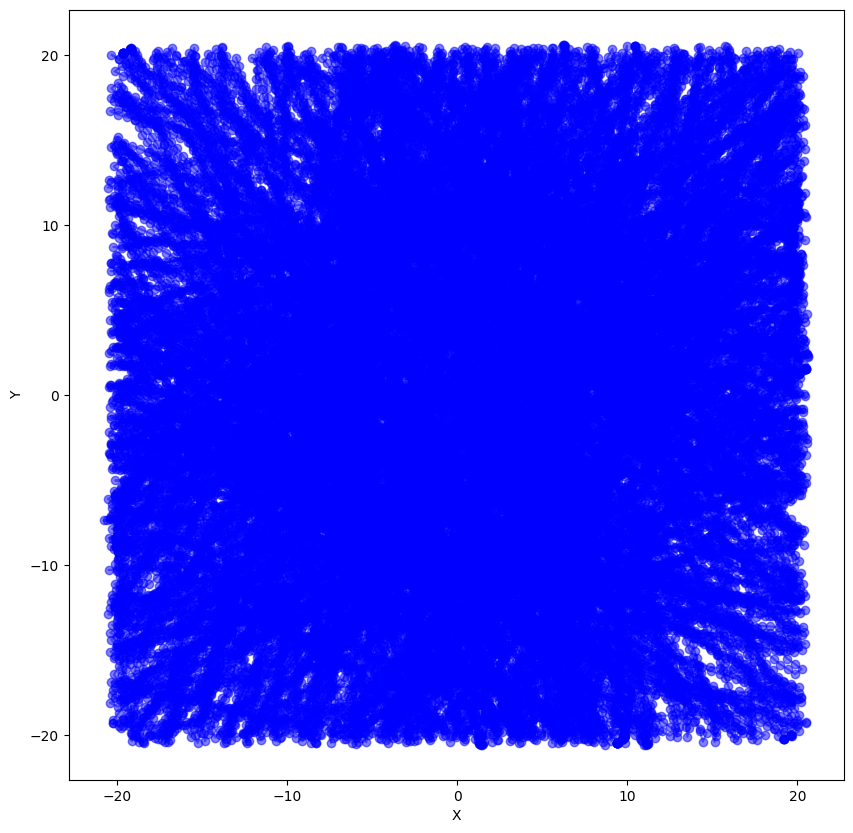

In [5]:
colList = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
ax = None
for i in range(output.shape[1]):
    if ax is None:
        ax, fig = simplePlot(output[:, i, 0], output[:, i, 1], display=False, color='b')
    else:
        simplePlot(output[:, i, 0], output[:, i, 1], display=False,ax=ax, fig=fig, color='b')

plt.show()

In [6]:
def density_scatter( x , y, ax = None, fig = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    z[np.where(np.isnan(z))] = 0.0

    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.grid(zorder = 1)
    ax.scatter( x, y, c=z, **kwargs , zorder = 2)

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density of data')

    return ax

In [7]:
nbList = [10, 50, 100, 500, 1000, 1500]
count = [50, 10, 5]     # just to assure at least 500 trajectories

for j in tqdm(range(len(nbList))):
    nb = nbList[j]
    if nb >88888888888:
        count = [50, 10, 5]
        for i in range(3):
            if i == 0:
                output, interactions = sim.compute_main(nb, params, boundary)
            else:
                o, interactions = sim.compute_main(nb, params, boundary)
                output = np.vstack((output.reshape(-1, 2), o.reshape(-1, 2))).reshape(-1, nb, 2)
    else:
        output, interactions = sim.compute_main(nb, params, boundary)

    inds = np.arange(output.shape[0]-1)
    inds2 = np.arange(output.shape[0]-1)+1
    v = (output[inds2, :, :] - output[inds, :, :])
    vects = v.reshape(-1,2)
    
    density_scatter(np.abs(vects[:, 0]), np.abs(vects[:, 1]))
    plt.savefig(f"nb{nb}_.pdf")
    plt.close()


  0%|          | 0/6 [00:00<?, ?it/s]

v0:50, tau:5.0, k:10.0, epsilon:2.0


 17%|█▋        | 1/6 [00:01<00:05,  1.06s/it]

v0:50, tau:5.0, k:10.0, epsilon:2.0


 33%|███▎      | 2/6 [00:01<00:03,  1.04it/s]

v0:50, tau:5.0, k:10.0, epsilon:2.0


 50%|█████     | 3/6 [00:03<00:03,  1.13s/it]

v0:50, tau:5.0, k:10.0, epsilon:2.0


 67%|██████▋   | 4/6 [00:12<00:08,  4.21s/it]

v0:50, tau:5.0, k:10.0, epsilon:2.0


 83%|████████▎ | 5/6 [00:37<00:11, 11.70s/it]

v0:50, tau:5.0, k:10.0, epsilon:2.0


100%|██████████| 6/6 [01:24<00:00, 14.14s/it]


In [8]:
print(vects.shape)

(148500, 2)


<Axes: >

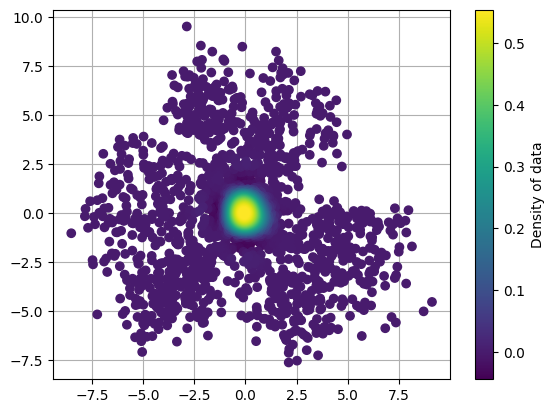

In [9]:
density_scatter(vects.reshape(-1,2)[:, 0], vects.reshape(-1,2)[:, 1])

(array([0.33934732, 0.32446466, 0.33162197, 0.32026116, 0.32094281,
        0.32378301, 0.32491909, 0.31139973, 0.31912508, 0.32139724,
        0.32298775, 0.31276303, 0.3081051 , 0.31776178, 0.33094032,
        0.33525743, 0.34514133, 0.34445968, 0.33821124, 0.33457578,
        0.33457578, 0.3236694 , 0.31605766, 0.32730486, 0.31742096,
        0.31287663, 0.31423993, 0.30640097, 0.30628737, 0.29594903,
        0.29844841, 0.2926544 , 0.29981171, 0.29401769, 0.30049335,
        0.30287912, 0.30185665, 0.30231108, 0.31401272, 0.31594405,
        0.30992282, 0.31117251, 0.30787788, 0.32685043, 0.30787788,
        0.3208292 , 0.31469436, 0.31458076, 0.33571186, 0.33809763,
        0.31867065, 0.326396  , 0.3334397 ]),
 array([-1.57076297, -1.51148895, -1.45221494, -1.39294092, -1.33366691,
        -1.27439289, -1.21511888, -1.15584486, -1.09657084, -1.03729683,
        -0.97802281, -0.9187488 , -0.85947478, -0.80020077, -0.74092675,
        -0.68165273, -0.62237872, -0.5631047 , -0.50383

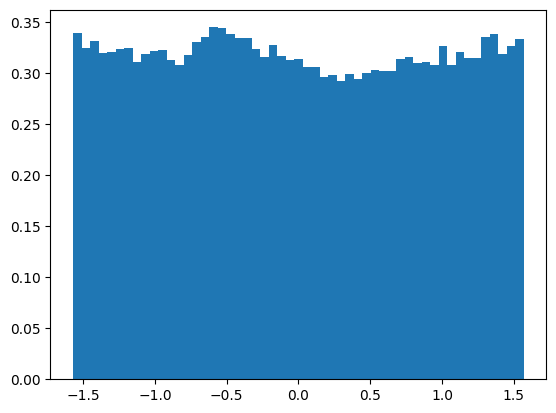

In [10]:
tans = vects.reshape(-1,2)[:, 1]/vects.reshape(-1,2)[:, 0]
plt.hist(np.arctan(tans), bins='auto', density=True)

(array([1., 1., 5., ..., 0., 0., 1.]),
 array([7.62948980e-03, 1.47085077e-02, 2.17875257e-02, ...,
        1.01660202e+01, 1.01730993e+01, 1.01801783e+01]),
 <BarContainer object of 1437 artists>)

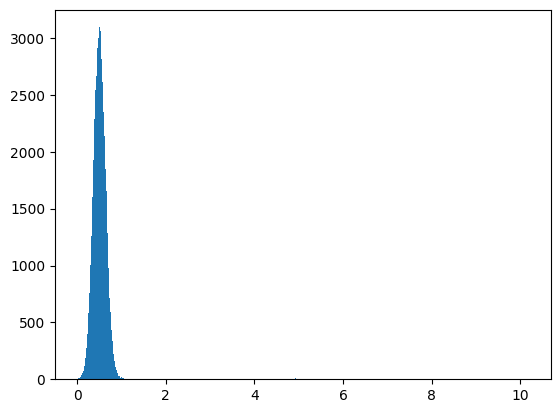

In [12]:
plt.hist(np.linalg.norm(vects.reshape(-1,2), axis = -1), bins = 'auto')

(<Axes: xlabel='X', ylabel='Y'>, <Figure size 1000x1000 with 1 Axes>)

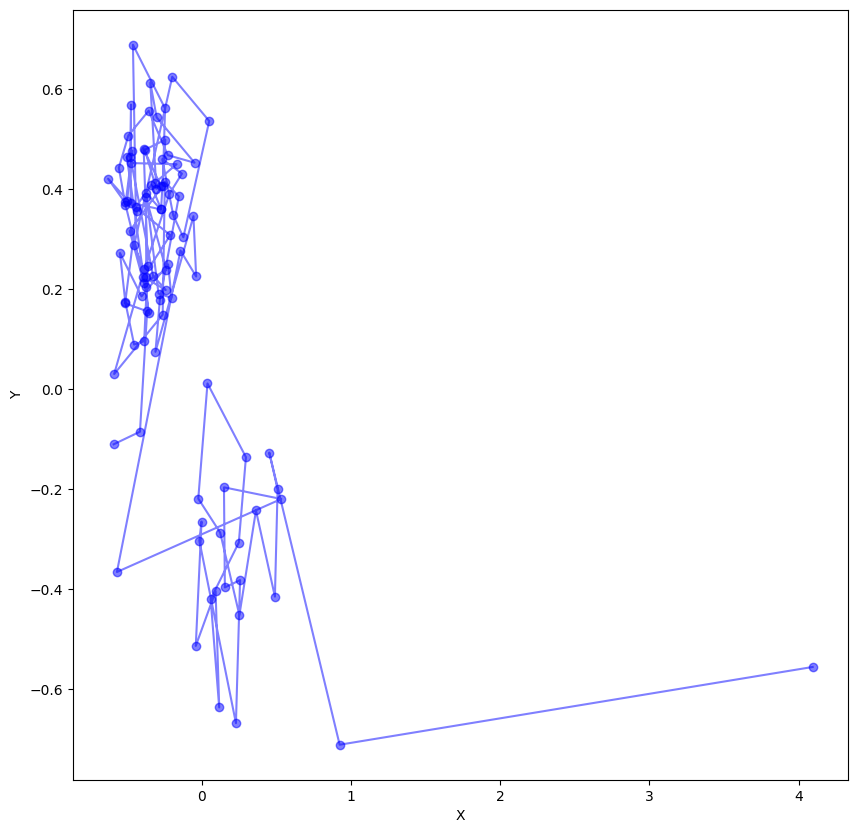

In [20]:
i = 4
simplePlot(vects[:, i, 0], vects[:, i, 1], display=False, color='b')

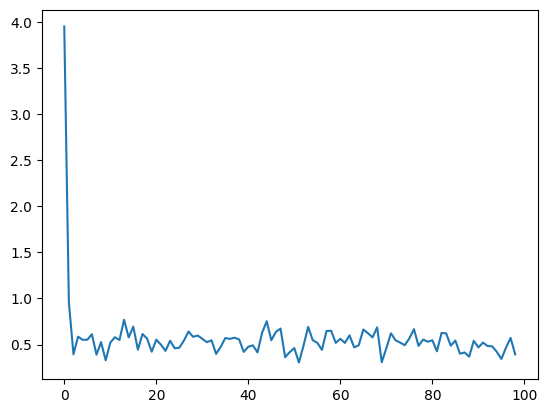

In [21]:
i = 7
v = vects[:, i, :].reshape(-1,2)
plt.plot(np.linalg.norm(v, axis = -1).reshape(-1))

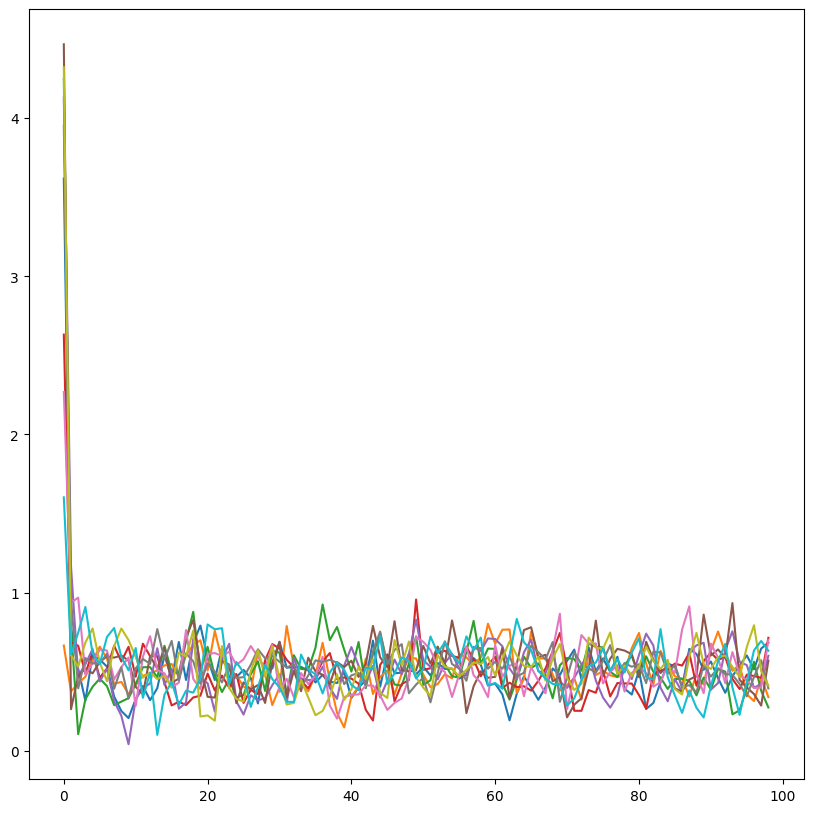

In [22]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
for i in range(10):
    v = vects[:, i, :].reshape(-1,2)
    ax.plot(np.linalg.norm(v, axis = -1).reshape(-1))


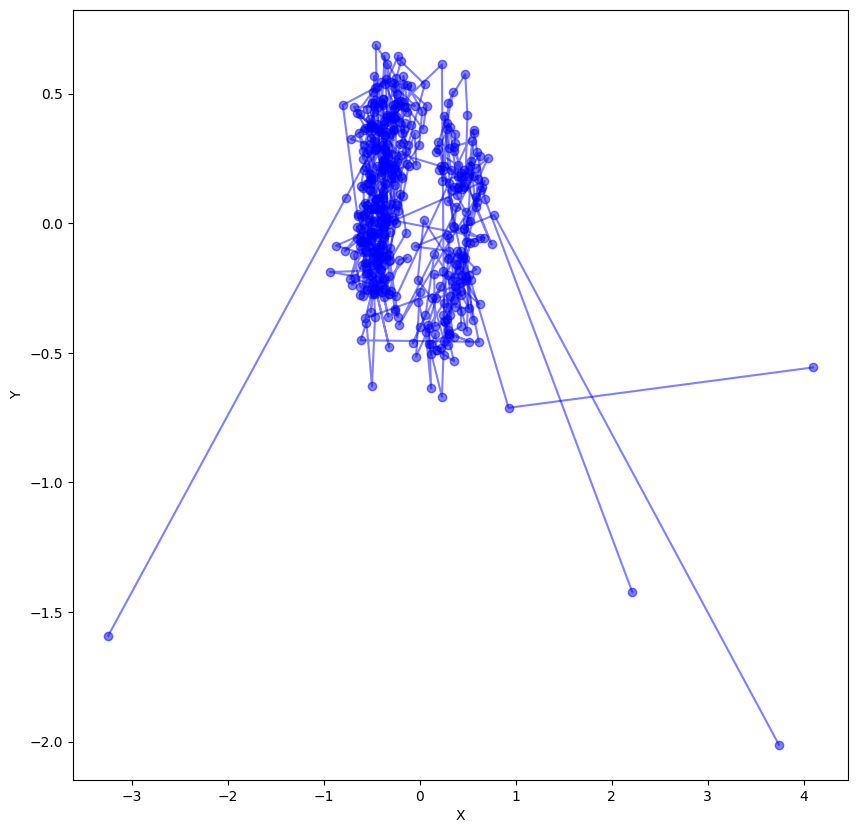

In [23]:
inds = np.arange(output.shape[0]-1)
inds2 = np.arange(output.shape[0]-1)+1
vects = (output[inds2, :, :] - output[inds, :, :])
ax = None
for i in range(5):
    if ax is None:
        ax, fig = simplePlot(vects[:, i, 0], vects[:, i, 1], display=False, color='b')
    else:
        simplePlot(vects[:, i, 0], vects[:, i, 1], display=False,ax=ax, fig=fig, color='b')

plt.show()

129.2513366649825
13.862762113240295


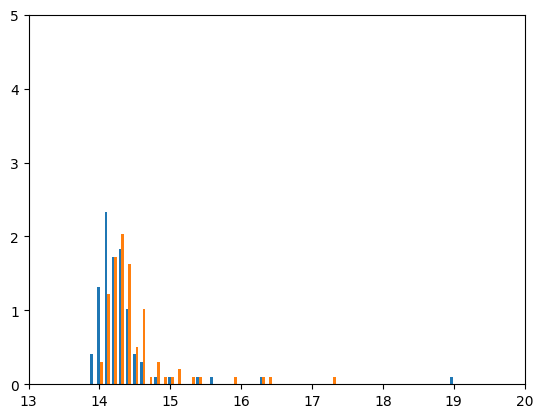

In [27]:
norms = np.linalg.norm(vects, axis = 1)
print(np.max(norms))
print(np.min(norms))
plt.hist(norms, bins='auto', density='True')
plt.xlim([13, 20])
plt.ylim([0, 5])
plt.show()

In [28]:
def selectNorm(vects:np.array, threshold:int)->np.array:
    mask = np.where(vects < threshold)
    return mask
    
mask = selectNorm(norms, 1)

In [29]:
v2 = vects[mask]

c:\Users\jepi1\miniconda3\envs\pythonENV2\lib\site-packages\numpy\lib\histograms.py:1124: RuntimeWarning: invalid value encountered in divide
  hist /= s


ValueError: zero-size array to reduction operation minimum which has no identity

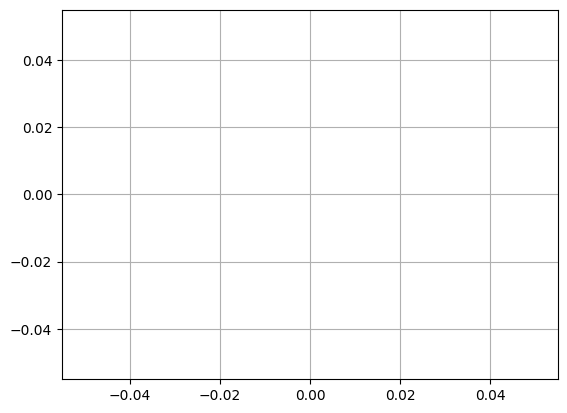

In [30]:
density_scatter(v2[:, 0], v2[:, 1])

In [ ]:
import numpy as np

def hurst_exponent(time_series):
    """
    Compute the Hurst exponent of a time series using R/S analysis.
    
    Parameters:
    - time_series: A 1D numpy array representing the time series data.
    
    Returns:
    - hurst: The estimated Hurst exponent.
    """
    # Number of data points in the time series
    n = len(time_series)
    
    # Create a range of sub-series sizes
    sub_series_sizes = 2**np.arange(2, int(np.log2(n)) + 1)
    
    # Initialize an array to store the R/S values
    rs_values = np.zeros(len(sub_series_sizes))
    
    for i, sub_size in enumerate(sub_series_sizes):
        num_sub_series = n // sub_size
        sub_series = np.array_split(time_series, num_sub_series)
        
        # Calculate the range (R) and standard deviation (S) for each sub-series
        sub_ranges = [np.ptp(sub) for sub in sub_series]
        sub_stdevs = [np.std(sub) for sub in sub_series]
        
        # Compute the rescaled range (R/S) for each sub-series
        rs_values[i] = np.mean(sub_ranges) / np.mean(sub_stdevs)
    
    # Fit a linear regression line to the R/S values
    coeffs = np.polyfit(np.log2(sub_series_sizes), np.log2(rs_values), 1)
    
    # The slope of the regression line is the estimated Hurst exponent
    hurst = coeffs[0]
    
    return hurst


In [ ]:
## mean : np.mean()
## var: np.var()
## kurtosis: stats.kurtosis(vect, fisher=False)
## skewness: stats.skew(vect)
## entropy: ...

In [10]:
inds = np.arange(output.shape[0]-1)
inds2 = np.arange(output.shape[0]-1)+1
v = (output[inds2, :, :] - output[inds, :, :])
vects = v.reshape(-1,2)

In [9]:
print(output.shape)

(100, 500, 2)


In [33]:
import scipy.stats as stats

class distributionStats():
    def __init__(self, vect, d, info = None):
        self.statistics = {}
        self.info = info

        if 'mean' in d:
            self.statistics['mean'] = np.mean(vect, axis=0)
        
        if 'variance' in d:
            self.statistics['variance'] = np.var(vect, axis=0)

        if 'kurtosis' in d:
            self.statistics['kurtosis'] = stats.kurtosis(vect, fisher = False)      # check ficher definition and the other

        if 'skewness' in d:
            self.statistics['skewness'] = stats.skew(vect)

    def _addElement(self, name:str, value)->None:
        """
        Function to add an element to the statistics summary of some distribution
        to the summary

        Args:
        -----
        - `name`: name to add
        - `value`: associated value
        """

        if name not in self.statistics:
            self.statistics[name] = value

In [ ]:



def getMSD(vect):
    inds = np.arange(vect.shape[0])
    v = (vect[inds] - vect[0]) **2
    return np.mean(v, axis = 1)


def sumSquaredDist(vect):
    inds = np.arange(vect.shape[0])
    v = (vect[inds] - vect[0]) ** 2
    return np.mean(np.mean(v, axis = 1), axis = 0)

def autoCorrelation(vect0, vect1):
    

def getFractalDimension():
    pass



In [ ]:
def _getHistogram(self,vect:np.array, bin:int = None)->None:
    self.statistics['histogram_x'] = np.histogram(vect[:, 0], density=True)
    self.statistics['histogram_y'] = np.histogram(vect[:, 1], density=True)

In [34]:
d = ['mean', 'variance', 'kurtosis', 'skewness']

dis = distributionStats(vects, d)
#dis._getHistogram(vects)

In [35]:
print(dis.statistics)

{'mean': array([-0.00160673,  0.00178036]), 'variance': array([0.13132217, 0.13887013]), 'kurtosis': array([1.90863233, 1.88483103]), 'skewness': array([ 0.01206938, -0.00680085]), 'histogram_x': (array([4.49679289e-04, 1.91113698e-03, 5.91890364e-02, 9.12736537e-01,
       6.75418292e-01, 9.29037411e-01, 2.00500753e-01, 2.30460636e-03,
       6.74518934e-04, 1.68629733e-04]), array([-1.65917247, -1.2997693 , -0.94036613, -0.58096296, -0.2215598 ,
        0.13784337,  0.49724654,  0.85664971,  1.21605288,  1.57545605,
        1.93485922])), 'histogram_y': (array([4.99818238e-05, 4.99818238e-04, 5.99781885e-04, 1.71937474e-02,
       7.83615033e-01, 6.50913291e-01, 9.17216448e-01, 1.02312793e-01,
       1.19956377e-03, 4.99818238e-04]), array([-2.28147977, -1.87729244, -1.4731051 , -1.06891776, -0.66473043,
       -0.26054309,  0.14364425,  0.54783158,  0.95201892,  1.35620625,
        1.76039359]))}
